<a href="https://colab.research.google.com/github/josephmailil1/Speciale---Stibo/blob/main/Agent%20Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -qU langchain langchain-openai langchain-community langchain-experimental pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.6/867.6 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.7/116.7 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.9/312.9 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import userdata
openai_api_key = userdata.get('OpenAI_Key') #use the name of your colab key

In [3]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/My Drive/Speciale")

# load data

In [4]:
shap = pd.read_csv("shap_noincome.csv")
data = pd.read_csv("basedata.csv")

In [5]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4-turbo", temperature=0, openai_api_key=openai_api_key)

In [6]:
from langchain_experimental.tools import PythonAstREPLTool

In [7]:
tools = [PythonAstREPLTool(locals={"data": data, "shap": shap})]

In [8]:
llm_with_tools = llm.bind_tools(tools)

In [9]:
from langchain.output_parsers import JsonOutputToolsParser

In [10]:
parser = JsonOutputToolsParser(tool = tools)

In [11]:
shap.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_nan
0,-0.022101,0.000766,0.084074,-0.021656,-0.005933,-0.034953,-0.000363,0.000054,0.000798,-0.001531,...,-0.000001,0.0,0.0,0.0,0.0,0.0,-0.011629,0.0,0.0,0.0
1,0.011602,0.000294,-0.021314,-0.017538,-0.004477,-0.018154,-0.000267,-0.000331,0.003377,-0.001128,...,-0.000012,0.0,0.0,0.0,0.0,0.0,0.000266,0.0,0.0,0.0
2,0.017450,0.001558,-0.024280,-0.021520,-0.006243,0.028643,-0.000503,-0.000111,0.004324,-0.001740,...,-0.000003,0.0,0.0,0.0,0.0,0.0,0.000442,0.0,0.0,0.0
3,0.014643,-0.000331,-0.026345,-0.020824,-0.005290,-0.021047,-0.000329,0.000124,0.007070,-0.001260,...,-0.000014,0.0,0.0,0.0,0.0,0.0,0.000280,0.0,0.0,0.0
4,-0.029555,-0.000225,-0.016020,-0.016305,-0.003038,-0.006810,-0.000265,-0.000109,-0.001264,-0.000696,...,-0.000004,0.0,0.0,0.0,0.0,0.0,-0.001435,0.0,0.0,0.0
5,-0.003490,-0.000316,-0.019392,-0.019479,-0.003930,-0.014779,-0.000383,0.000249,0.006716,-0.001128,...,-0.000004,0.0,0.0,0.0,0.0,0.0,0.000181,0.0,0.0,0.0
6,0.021889,-0.001353,-0.034703,-0.022791,-0.006854,0.027253,-0.000554,-0.000064,-0.002040,-0.001171,...,0.000003,0.0,0.0,0.0,0.0,0.0,0.000618,0.0,0.0,0.0
7,-0.019340,-0.002388,-0.043083,-0.020792,-0.004932,-0.008727,-0.000566,0.006629,0.005920,-0.001531,...,0.000002,0.0,0.0,0.0,0.0,0.0,0.000448,0.0,0.0,0.0
8,-0.036345,-0.000201,-0.021626,-0.017284,-0.003313,-0.017419,-0.000230,-0.000058,-0.001855,-0.000741,...,-0.000019,0.0,0.0,0.0,0.0,0.0,0.000240,0.0,0.0,0.0
9,0.017704,-0.001766,0.088942,-0.021998,-0.004438,0.020494,-0.000243,0.000971,-0.002478,-0.000942,...,-0.000004,0.0,0.0,0.0,0.0,0.0,0.000452,0.0,0.0,0.0


# prompt template

In [12]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            f"""You have access to a pandas dataframe `data`. \
            This is the final dataframe that was used to predict Income with, using a Random Forest ML model. \
            The dataset is a publicly available dataset called `adult census`, where prediction task is to determine whether a person makes over $50K a year. \
            Here is the output of `data.head().to_markdown()`:

              ```
            {data.head().to_markdown()}
            ```
            You are also given the pandas dateframe `shap`. This dataframe contains shap values for the test set obsevations. \
            The shap obsevation shows which values are important for the final prediction of each local prediction.
            ```
            {shap.head().to_markdown()}
            ```

            If asked about the importance/relevance of obsevations or features, use the `shap` dataframe to answer. \
            A high absolute values of the shap dataset means that the value is relevant. \

            Use the `data` dataframe to answer question about what the input values to the obsevation is. \

            Respond directly to the question once you have enough information to answer it. \
            Please add context to your answers, and try to explain the implications of the result.""",
        ),
        ("user", "{input}"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ]
)

# agent

In [13]:
from langchain.agents.format_scratchpad.openai_tools import (
    format_to_openai_tool_messages,
)
from langchain.agents.output_parsers.openai_tools import OpenAIToolsAgentOutputParser

agent = (
    {
        "input": lambda x: x["input"],
        "agent_scratchpad": lambda x: format_to_openai_tool_messages(
            x["intermediate_steps"]
        ),
    }
    | prompt
    | llm_with_tools
    | OpenAIToolsAgentOutputParser()
)

In [14]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True, return_intermediate_steps = False)

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
test = agent_executor.invoke({"input": "What are the five higest Shap values for obsevation 10, and what does it imply?"})



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'shap.iloc[10].nlargest(5)'}`


education-num                   0.052396
occupation_Exec-managerial      0.041552
marital-status_Never-married    0.031351
education_Bachelors             0.020849
sex_Male                        0.012968
Name: 10, dtype: float64
Invoking: `python_repl_ast` with `{'query': 'data.iloc[10]'}`


age                                  35
fnlwgt                           191480
education-num                        13
capital-gain                          0
capital-loss                          0
                                 ...   
native-country_Yugoslavia         False
native-country_nan                False
Actual Class                        0.0
Prediction                          0.0
Predicted Class Probability    0.758934
Name: 10, Length: 115, dtype: objectFor observation 10, the five highest SHAP values are associated with the following features:

1. `education-num` 

In [17]:
def call_agent(user_question):
    answer = agent_executor.invoke({"input": user_question})
    return answer['output']

# gradio

In [ ]:
pip install gradio

In [19]:
import gradio as gr

In [20]:
demo = gr.Interface(
    fn=call_agent,
    inputs=["text"],
    outputs=["text"]
)

In [21]:
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c1e0c44983338072a8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## example

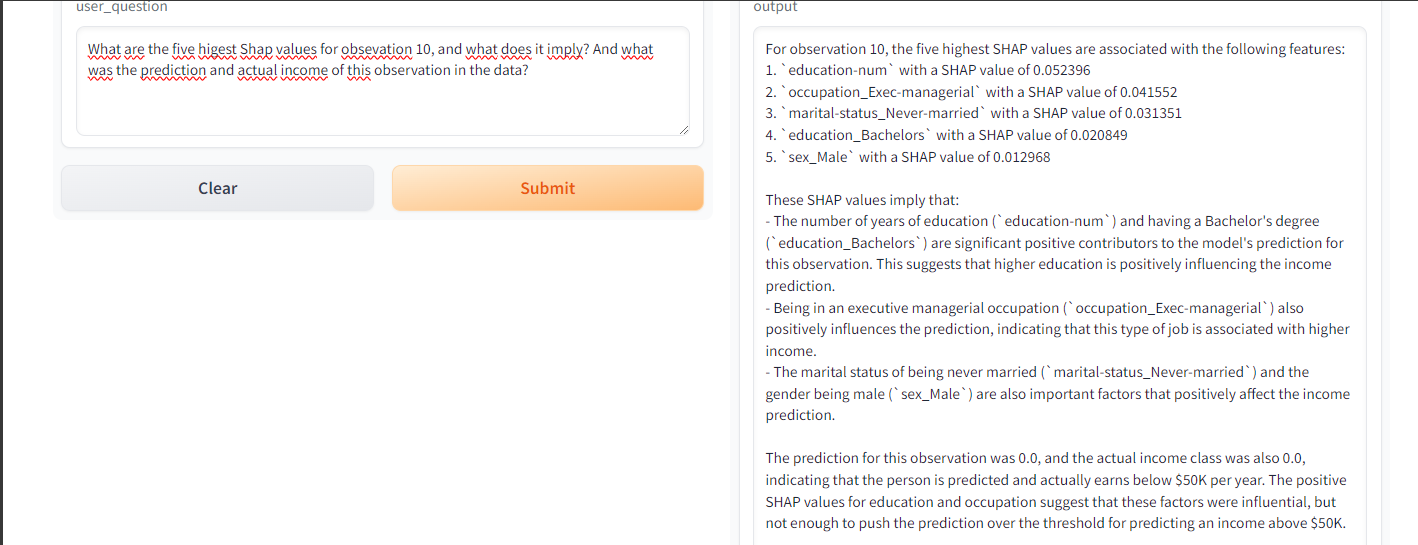

In [22]:
data.iloc[10]

age                                  35
fnlwgt                           191480
education-num                        13
capital-gain                          0
capital-loss                          0
                                 ...   
native-country_Yugoslavia         False
native-country_nan                False
Actual Class                        0.0
Prediction                          0.0
Predicted Class Probability    0.758934
Name: 10, Length: 115, dtype: object

In [24]:
shap.iloc[10].nlargest(5)

education-num                   0.052396
occupation_Exec-managerial      0.041552
marital-status_Never-married    0.031351
education_Bachelors             0.020849
sex_Male                        0.012968
Name: 10, dtype: float64

# other

In [ ]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
agent = create_pandas_dataframe_agent(llm, [shap, data], verbose=True)
agent.invoke("how many rows in the age column are different?")

In [ ]:
import pandas as pd


# Choose the row you want to find the highest values for
row_index = 10  # For example, choose the first row

# Get the row as a Series
row = shap.iloc[row_index]

# Sort the row values in descending order and get the top 5
top_5_values = row.sort_values(ascending=False).head(5)

print("Top 5 highest values in the row:")
print(top_5_values)

Top 5 highest values in the row:
Row_Number                      10.000000
education-num                    0.073776
occupation_Exec-managerial       0.059783
education_Bachelors              0.050896
marital-status_Never-married     0.027138
Name: 10, dtype: float64
